# Food Services Case Study- Data Exploration

In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')                                      # To ignore the warnings

pd.pandas.set_option('display.max_columns', None)                      # to display all columns

In [2]:
data = pd.read_excel('Food services dataset.xlsx', sheet_name = None)  # read all sheets in the file

In [3]:
data.keys()                                                            # list of sheets in the file

dict_keys(['Restaurant Spends and Share', 'Non Commercial', 'Retail Stores'])

## Restaurant Spends and Share Data

In [4]:
# Reading the dataset

df1 = data['Restaurant Spends and Share']
df1.head()

,NAME,CITY,STATE,ZIP,ZIP_PLUS4,COUNTY_CODE,COUNTY_NAME,MSA,MARKET_SEGMENT,SIMPLIFIED_MENU,MENU_TYPE,UNITS,EMPLOYEES,YEARS_IN_BUSINESS,ANNUAL_SALES,AVERAGE_CHECK,NUMBER_OF_ROOMS,FOOD_BEVERAGE_PURCHASE,FOOD_PURCHASE,BEVERAGE_PURCHASE,TOTAL_CATEGORY_DRY,TOTAL_CATEGORY_FRESH,TOTAL_CATEGORY_FROZEN,TOTAL_CATEGORY_PROTEIN,% Share of F&B Purchases from Company
0,APPLEBEE'S,POTTSTOWN,PA,19464,NaN,42091.0,MONTGOMERY,6162.0,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",CLASSIC & VARIED MENU,VARIED MENU,501+ UNITS,OVER 50,5 YEARS PLUS,"$1,000,001 - $2,500,000",$10 TO $15,NOT APPLICABLE,597290.100988,545006.687015,52283.413973,73292.586865,96286.339607,124412.626443,212623.779075,0.578681
1,STANS RESTAURANT,SAN LEANDRO,CA,94577,3236.0,6001.0,ALAMEDA,7362.0,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",CLASSIC & VARIED MENU,VARIED MENU,INDEPENDENT (1-9 UNITS),1 TO 4,5 YEARS PLUS,"<=$500,000",$15 TO $20,NOT APPLICABLE,39742.939174,36264.065946,3478.873227,4876.797417,6406.773077,8278.261162,14147.721358,0.339348
2,THANH THANH,OAKLAND,CA,94606,2978.0,6001.0,ALAMEDA,7362.0,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",CLASSIC & VARIED MENU,VARIED MENU,INDEPENDENT (1-9 UNITS),1 TO 4,5 YEARS PLUS,"<=$500,000",$15 TO $20,NOT APPLICABLE,39742.939174,36264.065946,3478.873227,4876.797417,6406.773077,8278.261162,14147.721358,0.646409
3,DOMINO'S PIZZA,WENDELL,NC,27591,6904.0,37183.0,WAKE,6640.0,"LSR - QUICK SERVICE RESTAURANTS, FAST FOOD, SN...","PIZZA, PASTA & ITALIAN",PIZZERIA,501+ UNITS,20 TO 49,5 YEARS PLUS,"$500,001 - $1,000,000",$7 TO $10,NOT APPLICABLE,282606.140700,231329.707646,51276.433054,49474.097973,27035.026215,58876.279313,53078.768135,0.797020
4,NINNA RESTAURANT,OAKLAND,CA,94611,5221.0,6001.0,ALAMEDA,7362.0,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",OTHER ASIAN,ASIAN UNCLASSIFIED,INDEPENDENT (1-9 UNITS),1 TO 4,5 YEARS PLUS,"<=$500,000",$15 TO $20,NOT APPLICABLE,42645.370261,40042.762870,2602.607391,6395.821567,8260.449546,5938.274331,15827.198446,0.655083


In [5]:
# Checking no. of rows & columns

df1.shape

(1000, 25)

In [6]:
# Displaying basic information of all columns

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   NAME                                   1000 non-null   object 
 1   CITY                                   1000 non-null   object 
 2   STATE                                  1000 non-null   object 
 3   ZIP                                    1000 non-null   int64  
 4   ZIP_PLUS4                              962 non-null    float64
 5   COUNTY_CODE                            999 non-null    float64
 6   COUNTY_NAME                            999 non-null    object 
 7   MSA                                    826 non-null    float64
 8   MARKET_SEGMENT                         1000 non-null   object 
 9   SIMPLIFIED_MENU                        1000 non-null   object 
 10  MENU_TYPE                              1000 non-null   object 
 11  UNITS

In [7]:
# Checking for null values

df1.isnull().sum()

NAME                                       0
CITY                                       0
STATE                                      0
ZIP                                        0
ZIP_PLUS4                                 38
COUNTY_CODE                                1
COUNTY_NAME                                1
MSA                                      174
MARKET_SEGMENT                             0
SIMPLIFIED_MENU                            0
MENU_TYPE                                  0
UNITS                                      0
EMPLOYEES                                  0
YEARS_IN_BUSINESS                          0
ANNUAL_SALES                               0
AVERAGE_CHECK                              0
NUMBER_OF_ROOMS                            0
FOOD_BEVERAGE_PURCHASE                   111
FOOD_PURCHASE                            111
BEVERAGE_PURCHASE                        111
TOTAL_CATEGORY_DRY                       111
TOTAL_CATEGORY_FRESH                     111
TOTAL_CATE

In [8]:
# Checking for duplicate rows

df1.duplicated().sum()

0

In [9]:
# Dropping unnecessary columns

df1.drop(['MSA', 'ZIP_PLUS4', 'NUMBER_OF_ROOMS', 'TOTAL_CATEGORY_DRY', 'TOTAL_CATEGORY_FRESH', 'TOTAL_CATEGORY_FROZEN', 'TOTAL_CATEGORY_PROTEIN'], axis=1, inplace=True)
df1.head(3)

,NAME,CITY,STATE,ZIP,COUNTY_CODE,COUNTY_NAME,MARKET_SEGMENT,SIMPLIFIED_MENU,MENU_TYPE,UNITS,EMPLOYEES,YEARS_IN_BUSINESS,ANNUAL_SALES,AVERAGE_CHECK,FOOD_BEVERAGE_PURCHASE,FOOD_PURCHASE,BEVERAGE_PURCHASE,% Share of F&B Purchases from Company
0,APPLEBEE'S,POTTSTOWN,PA,19464,42091.0,MONTGOMERY,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",CLASSIC & VARIED MENU,VARIED MENU,501+ UNITS,OVER 50,5 YEARS PLUS,"$1,000,001 - $2,500,000",$10 TO $15,597290.100988,545006.687015,52283.413973,0.578681
1,STANS RESTAURANT,SAN LEANDRO,CA,94577,6001.0,ALAMEDA,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",CLASSIC & VARIED MENU,VARIED MENU,INDEPENDENT (1-9 UNITS),1 TO 4,5 YEARS PLUS,"<=$500,000",$15 TO $20,39742.939174,36264.065946,3478.873227,0.339348
2,THANH THANH,OAKLAND,CA,94606,6001.0,ALAMEDA,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",CLASSIC & VARIED MENU,VARIED MENU,INDEPENDENT (1-9 UNITS),1 TO 4,5 YEARS PLUS,"<=$500,000",$15 TO $20,39742.939174,36264.065946,3478.873227,0.646409


In [10]:
df1[df1['COUNTY_CODE'].isnull()]                       # County_name & County_code each have 1 null value

,NAME,CITY,STATE,ZIP,COUNTY_CODE,COUNTY_NAME,MARKET_SEGMENT,SIMPLIFIED_MENU,MENU_TYPE,UNITS,EMPLOYEES,YEARS_IN_BUSINESS,ANNUAL_SALES,AVERAGE_CHECK,FOOD_BEVERAGE_PURCHASE,FOOD_PURCHASE,BEVERAGE_PURCHASE,% Share of F&B Purchases from Company
635,UNCLE BEAR'S GRILL AND BAR,HIGLEY,AZ,85236,NaN,NaN,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",AMERICAN AND AMERICAN TRADITIONAL,AMERICAN TRADITIONAL,INDEPENDENT (1-9 UNITS),5 TO 9,5 YEARS PLUS,"<=$500,000",$15 TO $20,86932.085323,78865.921533,8066.16379,0.375721


In [11]:
df1[df1['CITY'] == 'HIGLEY']

,NAME,CITY,STATE,ZIP,COUNTY_CODE,COUNTY_NAME,MARKET_SEGMENT,SIMPLIFIED_MENU,MENU_TYPE,UNITS,EMPLOYEES,YEARS_IN_BUSINESS,ANNUAL_SALES,AVERAGE_CHECK,FOOD_BEVERAGE_PURCHASE,FOOD_PURCHASE,BEVERAGE_PURCHASE,% Share of F&B Purchases from Company
635,UNCLE BEAR'S GRILL AND BAR,HIGLEY,AZ,85236,NaN,NaN,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",AMERICAN AND AMERICAN TRADITIONAL,AMERICAN TRADITIONAL,INDEPENDENT (1-9 UNITS),5 TO 9,5 YEARS PLUS,"<=$500,000",$15 TO $20,86932.085323,78865.921533,8066.16379,0.375721


In [12]:
# filling null value in County_name column

df1['COUNTY_NAME'] = df1['COUNTY_NAME'].fillna('Maricopa')

In [13]:
df1[df1['COUNTY_NAME'] == 'MARICOPA']

,NAME,CITY,STATE,ZIP,COUNTY_CODE,COUNTY_NAME,MARKET_SEGMENT,SIMPLIFIED_MENU,MENU_TYPE,UNITS,EMPLOYEES,YEARS_IN_BUSINESS,ANNUAL_SALES,AVERAGE_CHECK,FOOD_BEVERAGE_PURCHASE,FOOD_PURCHASE,BEVERAGE_PURCHASE,% Share of F&B Purchases from Company
249,SUBWAY,PHOENIX,AZ,85041,4013.0,MARICOPA,"LSR - QUICK SERVICE RESTAURANTS, FAST FOOD, SN...","SANDWICHES, SOUPS AND SALADS, DELI, SUBS & HOT...",SANDWICHES,501+ UNITS,5 TO 9,5 YEARS PLUS,"<=$500,000",$5 TO $7,140672.578500,120401.497165,20271.081335,0.966212
417,LITTLE CAESARS,PHOENIX,AZ,85043,4013.0,MARICOPA,"LSR - QUICK SERVICE RESTAURANTS, FAST FOOD, SN...","PIZZA, PASTA & ITALIAN",PIZZERIA,501+ UNITS,10 TO 19,5 YEARS PLUS,"<=$500,000",$5 TO $7,162541.363500,133049.642890,29491.720610,0.797584
424,COLD STONE CREAMERY,GLENDALE,AZ,85305,4013.0,MARICOPA,"LSR - ICE CREAM PARLORS, FROZEN DESSERTS",FROZEN DESSERT,ICE CREAM / DAIRY,501+ UNITS,10 TO 19,5 YEARS PLUS,"<=$500,000",$5 TO $7,83450.119200,68345.647625,15104.471575,0.312088
586,THE GELATO SPOT ITALIAN DESSERT LOUNGE,SCOTTSDALE,AZ,85251,4013.0,MARICOPA,NEIGHBORHOOD BARS & TAVERNS,SELECTION FOR LODGING AND BARS,NOT APPLICABLE,INDEPENDENT (1-9 UNITS),5 TO 9,5 YEARS PLUS,"$500,001 - $1,000,000",NOT APPLICABLE,NaN,NaN,NaN,NaN
722,MR. GOODCENTS DELI FRESH SUBS,SURPRISE,AZ,85388,4013.0,MARICOPA,"LSR - QUICK SERVICE RESTAURANTS, FAST FOOD, SN...","SANDWICHES, SOUPS AND SALADS, DELI, SUBS & HOT...",SANDWICHES,51-100 UNITS,1 TO 4,5 YEARS PLUS,"<=$500,000",$5 TO $7,116263.892700,99510.131233,16753.761467,0.776624
814,SUBWAY,TEMPE,AZ,85281,4013.0,MARICOPA,"LSR - QUICK SERVICE RESTAURANTS, FAST FOOD, SN...","SANDWICHES, SOUPS AND SALADS, DELI, SUBS & HOT...",SANDWICHES,501+ UNITS,5 TO 9,5 YEARS PLUS,"<=$500,000",$5 TO $7,140672.578500,120401.497165,20271.081335,0.061363
856,HONG KONG BISTRO,CHANDLER,AZ,85249,4013.0,MARICOPA,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",EUROPEAN,FRENCH,INDEPENDENT (1-9 UNITS),5 TO 9,5 YEARS PLUS,"<=$500,000",$15 TO $20,59392.738937,55768.055169,3624.683768,0.817760
906,COUNTRY INN & SUITES,SCOTTSDALE,AZ,85260,4013.0,MARICOPA,2* HOTELS WITHOUT RESTAURANT-MIDSCALE,SELECTION FOR LODGING AND BARS,NOT APPLICABLE,501+ UNITS,20 TO 49,5 YEARS PLUS,"$1,000,001 - $2,500,000",NOT APPLICABLE,NaN,NaN,NaN,NaN
954,PIZZA HUT,MESA,AZ,85209,4013.0,MARICOPA,"LSR - QUICK SERVICE RESTAURANTS, FAST FOOD, SN...","PIZZA, PASTA & ITALIAN",PIZZERIA,501+ UNITS,5 TO 9,5 YEARS PLUS,"$500,001 - $1,000,000",$7 TO $10,190079.759700,155591.435953,34488.323747,0.920309
969,PANDA EXPRESS,MESA,AZ,85209,4013.0,MARICOPA,LSR - QUICK CASUAL,OTHER ASIAN,ASIAN UNCLASSIFIED,501+ UNITS,10 TO 19,5 YEARS PLUS,"$1,000,001 - $2,500,000",$5 TO $7,380259.210600,341896.345860,38362.864740,0.123799


In [14]:
# filling null value in County_code column

df1['COUNTY_CODE'] = df1['COUNTY_CODE'].fillna(4013)

In [15]:
df1['COUNTY_CODE'].isnull().sum()

0

In [16]:
# Converting County_code from float to int

df1['COUNTY_CODE'] = df1['COUNTY_CODE'].astype(int)

In [17]:
df1.head(3)

,NAME,CITY,STATE,ZIP,COUNTY_CODE,COUNTY_NAME,MARKET_SEGMENT,SIMPLIFIED_MENU,MENU_TYPE,UNITS,EMPLOYEES,YEARS_IN_BUSINESS,ANNUAL_SALES,AVERAGE_CHECK,FOOD_BEVERAGE_PURCHASE,FOOD_PURCHASE,BEVERAGE_PURCHASE,% Share of F&B Purchases from Company
0,APPLEBEE'S,POTTSTOWN,PA,19464,42091,MONTGOMERY,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",CLASSIC & VARIED MENU,VARIED MENU,501+ UNITS,OVER 50,5 YEARS PLUS,"$1,000,001 - $2,500,000",$10 TO $15,597290.100988,545006.687015,52283.413973,0.578681
1,STANS RESTAURANT,SAN LEANDRO,CA,94577,6001,ALAMEDA,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",CLASSIC & VARIED MENU,VARIED MENU,INDEPENDENT (1-9 UNITS),1 TO 4,5 YEARS PLUS,"<=$500,000",$15 TO $20,39742.939174,36264.065946,3478.873227,0.339348
2,THANH THANH,OAKLAND,CA,94606,6001,ALAMEDA,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",CLASSIC & VARIED MENU,VARIED MENU,INDEPENDENT (1-9 UNITS),1 TO 4,5 YEARS PLUS,"<=$500,000",$15 TO $20,39742.939174,36264.065946,3478.873227,0.646409


In [18]:
# Displaying the '% Share of F&B Purchases from Company' in the form of percentage

df1['% Share of F&B Purchases from Company'] = df1.apply(lambda x: x['% Share of F&B Purchases from Company'] * 100, axis=1)
df1.head(3)

,NAME,CITY,STATE,ZIP,COUNTY_CODE,COUNTY_NAME,MARKET_SEGMENT,SIMPLIFIED_MENU,MENU_TYPE,UNITS,EMPLOYEES,YEARS_IN_BUSINESS,ANNUAL_SALES,AVERAGE_CHECK,FOOD_BEVERAGE_PURCHASE,FOOD_PURCHASE,BEVERAGE_PURCHASE,% Share of F&B Purchases from Company
0,APPLEBEE'S,POTTSTOWN,PA,19464,42091,MONTGOMERY,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",CLASSIC & VARIED MENU,VARIED MENU,501+ UNITS,OVER 50,5 YEARS PLUS,"$1,000,001 - $2,500,000",$10 TO $15,597290.100988,545006.687015,52283.413973,57.868103
1,STANS RESTAURANT,SAN LEANDRO,CA,94577,6001,ALAMEDA,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",CLASSIC & VARIED MENU,VARIED MENU,INDEPENDENT (1-9 UNITS),1 TO 4,5 YEARS PLUS,"<=$500,000",$15 TO $20,39742.939174,36264.065946,3478.873227,33.934770
2,THANH THANH,OAKLAND,CA,94606,6001,ALAMEDA,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",CLASSIC & VARIED MENU,VARIED MENU,INDEPENDENT (1-9 UNITS),1 TO 4,5 YEARS PLUS,"<=$500,000",$15 TO $20,39742.939174,36264.065946,3478.873227,64.640894


In [19]:
df1_stats = df1[['FOOD_BEVERAGE_PURCHASE','FOOD_PURCHASE','BEVERAGE_PURCHASE','% Share of F&B Purchases from Company']]

In [20]:
df1_stats.describe().round(2)

,FOOD_BEVERAGE_PURCHASE,FOOD_PURCHASE,BEVERAGE_PURCHASE,% Share of F&B Purchases from Company
count,889.00,889.00,889.00,889.00
mean,222522.98,195890.31,26632.67,48.68
std,215544.60,195094.44,26123.89,28.83
min,23844.44,17293.85,1764.30,0.13
25%,88398.71,78586.61,8016.61,23.26
50%,156962.42,132447.23,16133.31,48.96
75%,269134.76,233474.05,38367.96,73.63
max,1588743.14,1449673.50,164893.75,99.99


In [21]:
# Converting the purchase values to thousands

df1['FOOD_BEVERAGE_PURCHASE(K)'] = df1.apply(lambda x: x['FOOD_BEVERAGE_PURCHASE'] / 1000, axis=1)
df1['FOOD_PURCHASE(K)'] = df1.apply(lambda x: x['FOOD_PURCHASE'] / 1000, axis=1)
df1['BEVERAGE_PURCHASE(K)'] = df1.apply(lambda x: x['BEVERAGE_PURCHASE'] / 1000, axis=1)
df1.head(3)

,NAME,CITY,STATE,ZIP,COUNTY_CODE,COUNTY_NAME,MARKET_SEGMENT,SIMPLIFIED_MENU,MENU_TYPE,UNITS,EMPLOYEES,YEARS_IN_BUSINESS,ANNUAL_SALES,AVERAGE_CHECK,FOOD_BEVERAGE_PURCHASE,FOOD_PURCHASE,BEVERAGE_PURCHASE,% Share of F&B Purchases from Company,FOOD_BEVERAGE_PURCHASE(K),FOOD_PURCHASE(K),BEVERAGE_PURCHASE(K)
0,APPLEBEE'S,POTTSTOWN,PA,19464,42091,MONTGOMERY,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",CLASSIC & VARIED MENU,VARIED MENU,501+ UNITS,OVER 50,5 YEARS PLUS,"$1,000,001 - $2,500,000",$10 TO $15,597290.100988,545006.687015,52283.413973,57.868103,597.290101,545.006687,52.283414
1,STANS RESTAURANT,SAN LEANDRO,CA,94577,6001,ALAMEDA,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",CLASSIC & VARIED MENU,VARIED MENU,INDEPENDENT (1-9 UNITS),1 TO 4,5 YEARS PLUS,"<=$500,000",$15 TO $20,39742.939174,36264.065946,3478.873227,33.934770,39.742939,36.264066,3.478873
2,THANH THANH,OAKLAND,CA,94606,6001,ALAMEDA,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",CLASSIC & VARIED MENU,VARIED MENU,INDEPENDENT (1-9 UNITS),1 TO 4,5 YEARS PLUS,"<=$500,000",$15 TO $20,39742.939174,36264.065946,3478.873227,64.640894,39.742939,36.264066,3.478873


In [22]:
df1.drop(['FOOD_BEVERAGE_PURCHASE', 'FOOD_PURCHASE', 'BEVERAGE_PURCHASE'], axis=1, inplace=True)

In [23]:
df1['MARKET_SEGMENT'].unique()

array(['FSR - TRADITIONAL RESTAURANTS, CASUAL DINING',
       'LSR - QUICK SERVICE RESTAURANTS, FAST FOOD, SNACKS',
       'LSR - QUICK CASUAL', 'LSR - COFFEE SHOPS, TEA HOUSES',
       'LSR - BUFFET RESTAURANTS', 'LSR - SMOOTHIE, JUICE',
       'FSR - CAF╔-RESTAURANTS, FAMILY-STYLE, DINER',
       'NEIGHBORHOOD BARS & TAVERNS',
       "BED & BREAKFAST, GUESTHOUSES, CHAMBRES D'HOTES",
       '2* HOTELS WITHOUT RESTAURANT-MIDSCALE',
       'LSR - ICE CREAM PARLORS, FROZEN DESSERTS',
       'FSR - UPSCALE CASUAL DINING RESTAURANTS',
       '3* HOTELS WITHOUT RESTAURANT-UPSCALE',
       'FSR - FINE DINING RESTAURANTS',
       'UNCODED HOTELS & MOTELS WITHOUT RESTAURANT',
       '1* HOTELS WITHOUT RESTAURANT-ECONOMY', 'SPORTS BARS',
       'LSR - DELIVERY AND TAKE AWAY ONLY', 'NIGHTLIFE VENUES',
       '4* HOTELS WITH RESTAURANT-UPPER SCALE',
       'EVENT CATERING, PARTY SERVICE',
       '4* HOTELS WITHOUT RESTAURANT-UPPER SCALE', 'RESORTS',
       'BREWPUBS, ENGLISH AND IRISH PUBS, MICRO

In [24]:
# Correcting the value

df1['MARKET_SEGMENT'].replace('FSR - CAF╔-RESTAURANTS, FAMILY-STYLE, DINER','FSR - CAFE-RESTAURANTS, FAMILY-STYLE, DINER',inplace=True)

In [25]:
df1['MARKET_SEGMENT'].unique()

array(['FSR - TRADITIONAL RESTAURANTS, CASUAL DINING',
       'LSR - QUICK SERVICE RESTAURANTS, FAST FOOD, SNACKS',
       'LSR - QUICK CASUAL', 'LSR - COFFEE SHOPS, TEA HOUSES',
       'LSR - BUFFET RESTAURANTS', 'LSR - SMOOTHIE, JUICE',
       'FSR - CAFE-RESTAURANTS, FAMILY-STYLE, DINER',
       'NEIGHBORHOOD BARS & TAVERNS',
       "BED & BREAKFAST, GUESTHOUSES, CHAMBRES D'HOTES",
       '2* HOTELS WITHOUT RESTAURANT-MIDSCALE',
       'LSR - ICE CREAM PARLORS, FROZEN DESSERTS',
       'FSR - UPSCALE CASUAL DINING RESTAURANTS',
       '3* HOTELS WITHOUT RESTAURANT-UPSCALE',
       'FSR - FINE DINING RESTAURANTS',
       'UNCODED HOTELS & MOTELS WITHOUT RESTAURANT',
       '1* HOTELS WITHOUT RESTAURANT-ECONOMY', 'SPORTS BARS',
       'LSR - DELIVERY AND TAKE AWAY ONLY', 'NIGHTLIFE VENUES',
       '4* HOTELS WITH RESTAURANT-UPPER SCALE',
       'EVENT CATERING, PARTY SERVICE',
       '4* HOTELS WITHOUT RESTAURANT-UPPER SCALE', 'RESORTS',
       'BREWPUBS, ENGLISH AND IRISH PUBS, MICRO

In [26]:
df1['MARKET_SEGMENT'].value_counts()

FSR - TRADITIONAL RESTAURANTS, CASUAL DINING                          292
LSR - QUICK SERVICE RESTAURANTS, FAST FOOD, SNACKS                    218
LSR - QUICK CASUAL                                                    138
FSR - CAFE-RESTAURANTS, FAMILY-STYLE, DINER                            71
LSR - COFFEE SHOPS, TEA HOUSES                                         67
FSR - UPSCALE CASUAL DINING RESTAURANTS                                37
NEIGHBORHOOD BARS & TAVERNS                                            28
2* HOTELS WITHOUT RESTAURANT-MIDSCALE                                  28
LSR - DELIVERY AND TAKE AWAY ONLY                                      26
LSR - ICE CREAM PARLORS, FROZEN DESSERTS                               17
NIGHTLIFE VENUES                                                       14
BED & BREAKFAST, GUESTHOUSES, CHAMBRES D'HOTES                         10
FSR - FINE DINING RESTAURANTS                                           9
LSR - BUFFET RESTAURANTS              

In [27]:
df1['SIMPLIFIED_MENU'].value_counts()[:10]

PIZZA, PASTA & ITALIAN                                148
CLASSIC & VARIED MENU                                 124
SELECTION FOR LODGING AND BARS                        108
SANDWICHES, SOUPS AND SALADS, DELI, SUBS & HOT DOG    100
MEXICAN                                                87
OTHER ASIAN                                            72
BEVERAGES                                              72
HAMBURGERS                                             55
STEAK, SEAFOOD & FISH                                  45
AMERICAN AND AMERICAN TRADITIONAL                      38
Name: SIMPLIFIED_MENU, dtype: int64

In [28]:
df2 = df1[df1['SIMPLIFIED_MENU'] != 'SELECTION FOR LODGING AND BARS']
df2.head()

,NAME,CITY,STATE,ZIP,COUNTY_CODE,COUNTY_NAME,MARKET_SEGMENT,SIMPLIFIED_MENU,MENU_TYPE,UNITS,EMPLOYEES,YEARS_IN_BUSINESS,ANNUAL_SALES,AVERAGE_CHECK,% Share of F&B Purchases from Company,FOOD_BEVERAGE_PURCHASE(K),FOOD_PURCHASE(K),BEVERAGE_PURCHASE(K)
0,APPLEBEE'S,POTTSTOWN,PA,19464,42091,MONTGOMERY,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",CLASSIC & VARIED MENU,VARIED MENU,501+ UNITS,OVER 50,5 YEARS PLUS,"$1,000,001 - $2,500,000",$10 TO $15,57.868103,597.290101,545.006687,52.283414
1,STANS RESTAURANT,SAN LEANDRO,CA,94577,6001,ALAMEDA,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",CLASSIC & VARIED MENU,VARIED MENU,INDEPENDENT (1-9 UNITS),1 TO 4,5 YEARS PLUS,"<=$500,000",$15 TO $20,33.934770,39.742939,36.264066,3.478873
2,THANH THANH,OAKLAND,CA,94606,6001,ALAMEDA,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",CLASSIC & VARIED MENU,VARIED MENU,INDEPENDENT (1-9 UNITS),1 TO 4,5 YEARS PLUS,"<=$500,000",$15 TO $20,64.640894,39.742939,36.264066,3.478873
3,DOMINO'S PIZZA,WENDELL,NC,27591,37183,WAKE,"LSR - QUICK SERVICE RESTAURANTS, FAST FOOD, SN...","PIZZA, PASTA & ITALIAN",PIZZERIA,501+ UNITS,20 TO 49,5 YEARS PLUS,"$500,001 - $1,000,000",$7 TO $10,79.701993,282.606141,231.329708,51.276433
4,NINNA RESTAURANT,OAKLAND,CA,94611,6001,ALAMEDA,"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",OTHER ASIAN,ASIAN UNCLASSIFIED,INDEPENDENT (1-9 UNITS),1 TO 4,5 YEARS PLUS,"<=$500,000",$15 TO $20,65.508265,42.645370,40.042763,2.602607


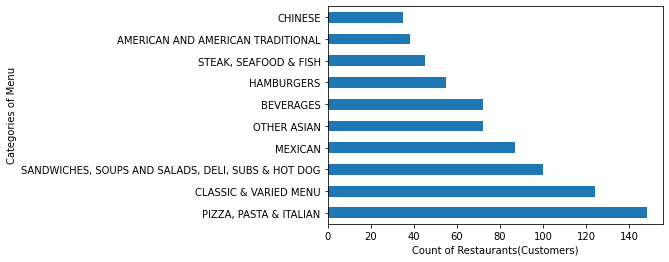

In [29]:
df2['SIMPLIFIED_MENU'].value_counts()[:10].plot(kind='barh')
plt.xlabel('Count of Restaurants(Customers)')
plt.ylabel('Categories of Menu')
plt.show()

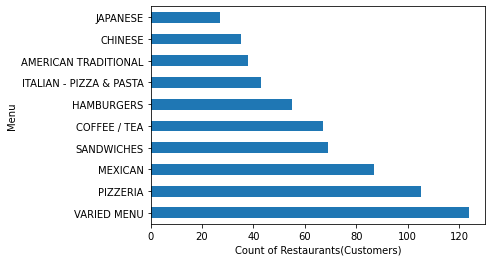

In [30]:
df2['MENU_TYPE'].value_counts()[:10].plot(kind='barh')
plt.xlabel('Count of Restaurants(Customers)')
plt.ylabel('Menu')
plt.show()

<AxesSubplot:xlabel='YEARS_IN_BUSINESS', ylabel='count'>

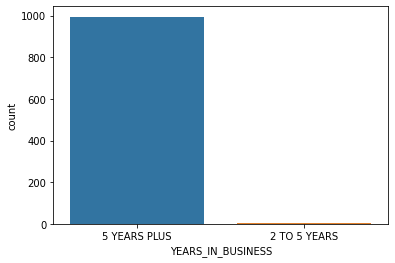

In [31]:
sns.countplot(df1['YEARS_IN_BUSINESS'])

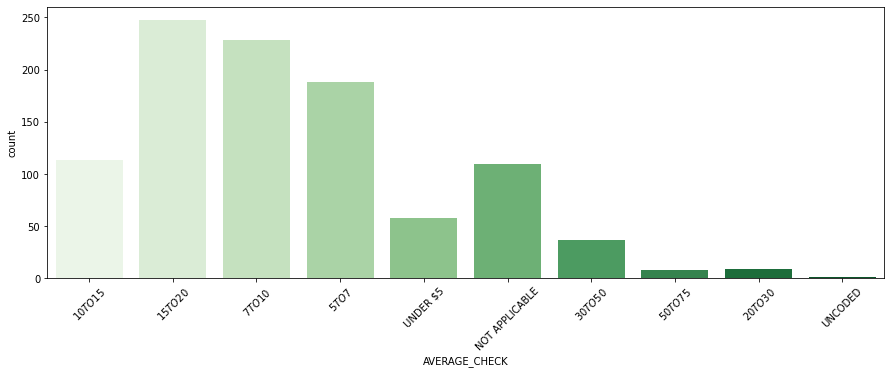

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(df1['AVERAGE_CHECK'], palette='Greens')
plt.xticks(rotation=45)
plt.show()

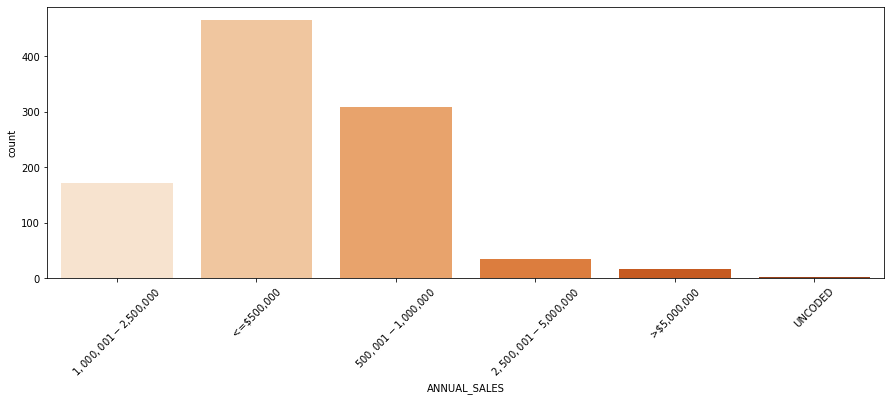

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(df1['ANNUAL_SALES'], palette='Oranges')
plt.xticks(rotation=45)
plt.show()

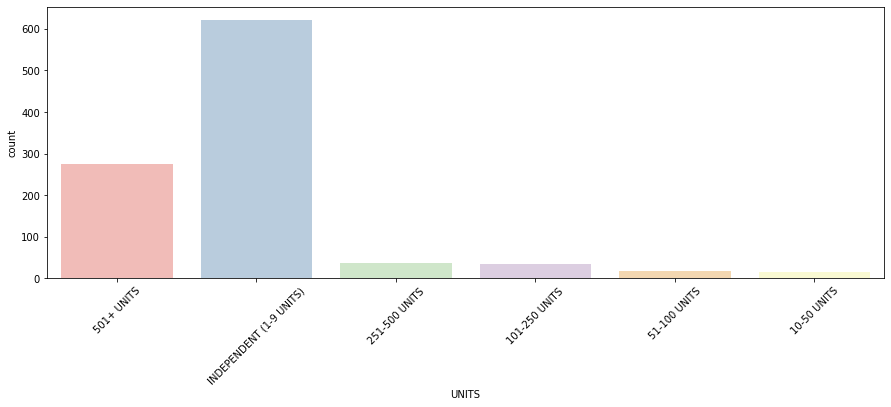

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(df1['UNITS'], palette='Pastel1')
plt.xticks(rotation=45)
plt.show()

### Top 10 Market segments by Food & Beverage Purchases

In [35]:
market_segments = pd.DataFrame(df1.groupby('MARKET_SEGMENT').sum()['FOOD_BEVERAGE_PURCHASE(K)']).sort_values('FOOD_BEVERAGE_PURCHASE(K)', ascending=False).round(2)[:10]

market_segments

,FOOD_BEVERAGE_PURCHASE(K)
MARKET_SEGMENT,
"FSR - TRADITIONAL RESTAURANTS, CASUAL DINING",68318.68
"LSR - QUICK SERVICE RESTAURANTS, FAST FOOD, SNACKS",59856.43
LSR - QUICK CASUAL,31634.09
"FSR - CAFE-RESTAURANTS, FAMILY-STYLE, DINER",10879.82
"LSR - COFFEE SHOPS, TEA HOUSES",10205.47
FSR - UPSCALE CASUAL DINING RESTAURANTS,6062.66
FSR - FINE DINING RESTAURANTS,4206.90
LSR - BUFFET RESTAURANTS,2717.74
LSR - DELIVERY AND TAKE AWAY ONLY,1813.50


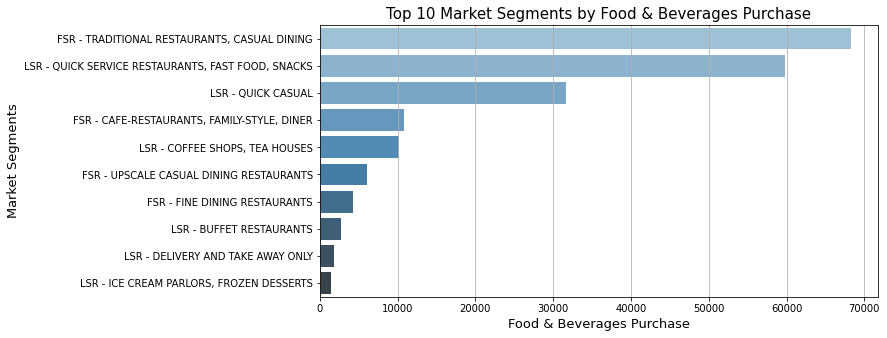

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(x=market_segments['FOOD_BEVERAGE_PURCHASE(K)'].values, y=market_segments.index, data=market_segments, 
            palette="Blues_d", orient='h')
plt.title('Top 10 Market Segments by Food & Beverages Purchase', fontsize=15)
plt.xlabel("Food & Beverages Purchase", fontsize=13)
plt.ylabel("Market Segments", fontsize=13)
plt.grid(axis = 'x')
plt.show()

### Top 10 Restaurants by Food & Beverages Purchase

In [37]:
Restaurants = pd.DataFrame(df1.groupby('NAME').sum()['FOOD_BEVERAGE_PURCHASE(K)']).sort_values('FOOD_BEVERAGE_PURCHASE(K)', ascending=False).round(2)[:10]


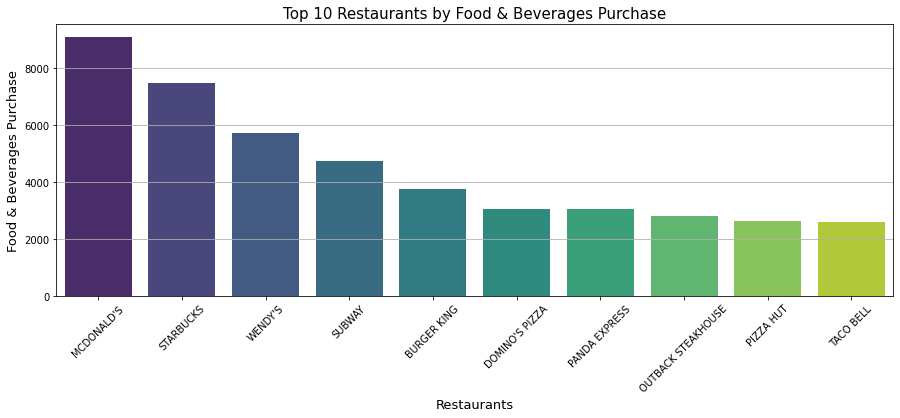

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(x=Restaurants.index, y=Restaurants['FOOD_BEVERAGE_PURCHASE(K)'].values, data=Restaurants, palette="viridis")
plt.title('Top 10 Restaurants by Food & Beverages Purchase', fontsize=15)
plt.xlabel("Restaurants", fontsize=13)
plt.ylabel("Food & Beverages Purchase", fontsize=13)
plt.xticks(rotation=45)
plt.grid(axis = 'y')
plt.show()

As can be seen, our major customers belong to **Quick Service Restaurants(QSR)** & **Fast-Casuals** type of Food Service establishments.

### Top 10 Restaurants with highest % share of F&B spends

In [39]:
per_share = pd.DataFrame(df1.groupby('NAME').mean()['% Share of F&B Purchases from Company']).round(2).sort_values('% Share of F&B Purchases from Company', ascending=False)
per_share[:10]

,% Share of F&B Purchases from Company
NAME,
CHINA BISTRO,99.99
CINDYS,99.79
MISTA ITALIAN KITCHEN INC,99.57
GREAT OUTDOOR SUB SHOP,99.17
CJ'S SPORTS BAR AND GRILL,98.89
PAPA BOB'S BAR B QUE,98.84
THE IRONGATE RESTAURANT AND LOUNGE,98.75
BRICK OVEN PIZZERIA,98.73
BOSSA NOVA COFFEEHOUSE & BAKERY,98.61


In [40]:
High_per_share = per_share[per_share['% Share of F&B Purchases from Company'] > 50]
High_per_share

,% Share of F&B Purchases from Company
NAME,
CHINA BISTRO,99.99
CINDYS,99.79
MISTA ITALIAN KITCHEN INC,99.57
GREAT OUTDOOR SUB SHOP,99.17
CJ'S SPORTS BAR AND GRILL,98.89
...,...
WHITE DOVE COFFEE SHOP,50.42
OLD TOWN BISTRO,50.35
CHECKERS DRIVE-IN RESTAURANTS,50.19


These restaurants(customers) have their more than 50% share of F&B purchases from us. Retaining these customers will increase sales significantly.

### Top 10 Cities by Food & Beverages Purchase

In [41]:
Cities = pd.DataFrame(df1.groupby('CITY').sum()['FOOD_BEVERAGE_PURCHASE(K)']).sort_values('FOOD_BEVERAGE_PURCHASE(K)', ascending=False).round(2)[:10]

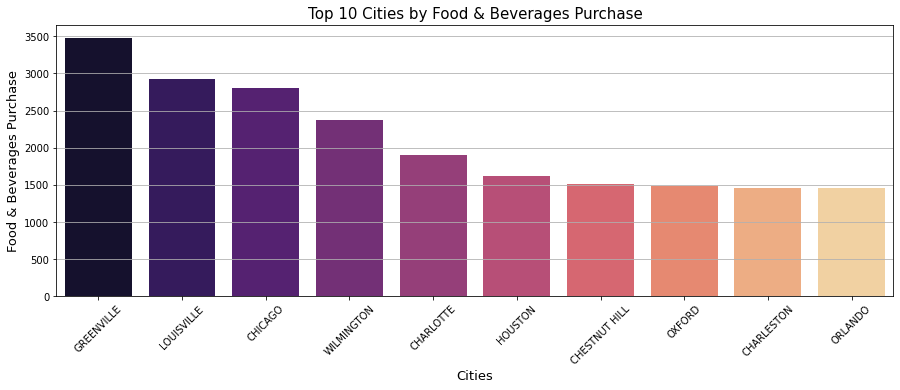

In [42]:
plt.figure(figsize=(15,5))
sns.barplot(x=Cities.index, y=Cities['FOOD_BEVERAGE_PURCHASE(K)'].values, data=Cities, palette="magma")
plt.title('Top 10 Cities by Food & Beverages Purchase', fontsize=15)
plt.xlabel("Cities", fontsize=13)
plt.ylabel("Food & Beverages Purchase", fontsize=13)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

### Top 10 Counties by Food & Beverages Purchase

In [43]:
Counties = pd.DataFrame(df1.groupby('COUNTY_NAME').sum()['FOOD_BEVERAGE_PURCHASE(K)']).sort_values('FOOD_BEVERAGE_PURCHASE(K)', ascending=False).round(2)[:10]

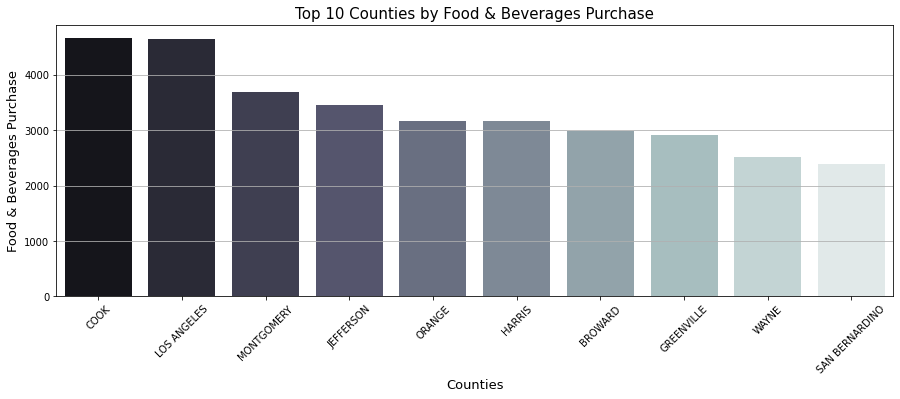

In [44]:
plt.figure(figsize=(15,5))
sns.barplot(x=Counties.index, y=Counties['FOOD_BEVERAGE_PURCHASE(K)'].values, data=Counties, palette="bone")
plt.title('Top 10 Counties by Food & Beverages Purchase', fontsize=15)
plt.xlabel("Counties", fontsize=13)
plt.ylabel("Food & Beverages Purchase", fontsize=13)
plt.xticks(rotation=45)
plt.grid(axis = 'y')
plt.show()

### Annual Sales of restaurants

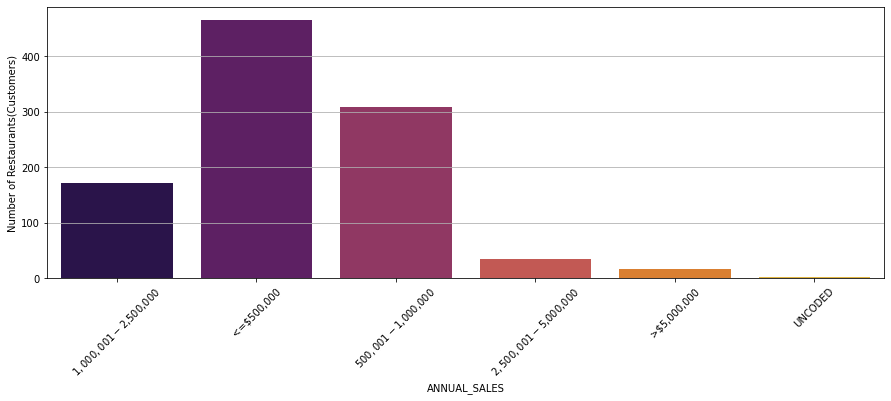

In [45]:
plt.figure(figsize=(15,5))
sns.countplot(df1['ANNUAL_SALES'], palette='inferno')
plt.ylabel('Number of Restaurants(Customers)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [46]:
less_than_Five_Mil = df1[df1['ANNUAL_SALES'] == '<=$500,000']

In [47]:
df3 = pd.DataFrame(less_than_Five_Mil.groupby(['ANNUAL_SALES', 'NAME']).mean()['FOOD_BEVERAGE_PURCHASE(K)']).sort_values('FOOD_BEVERAGE_PURCHASE(K)', ascending=False).round(2)[:10]

In [48]:
df3

FOOD_BEVERAGE_PURCHASE(K)
ANNUAL_SALES NAME                                                
<=$500,000   STARBUCKS                                     282.49
             DADDY'S PIZZA                                 222.32
             SPEEDY TACO                                   186.75
             CIRCA RESTAURANT & LOUNGE                     177.16
             WINGS TO GO                                   174.23
             DORALDO PIZZA CAFE INC                        169.24
             CANNOLI KITCHEN PIZZA                         169.24
             NINO'S PIZZA                                  169.24
             PAPA MURPHY'S PIZZA                           163.67
             CRISTY'S PIZZA                                161.63

Majority of our customers have their annual sales less than & equal to 500k (i.e. <= 0.5 Million). These are the ones that belong to **Casual-dinings** & **QSRs**.

### Number of Units of restaurants

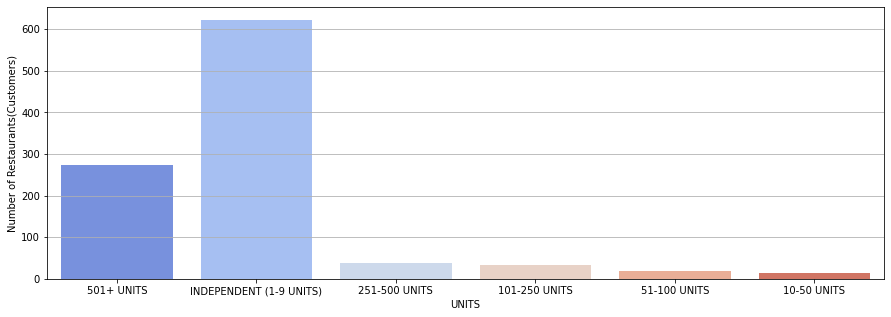

In [49]:
plt.figure(figsize=(15,5))
sns.countplot(df1['UNITS'], palette='coolwarm')
plt.ylabel('Number of Restaurants(Customers)')
plt.grid(axis='y')
plt.show()

In [50]:
independent_units = df1[df1['UNITS'] == 'INDEPENDENT (1-9 UNITS)']

In [51]:
df4 = pd.DataFrame(independent_units.groupby(['UNITS', 'NAME']).sum()['FOOD_BEVERAGE_PURCHASE(K)']).sort_values('FOOD_BEVERAGE_PURCHASE(K)', ascending=False).round(2)[:10]
df4

FOOD_BEVERAGE_PURCHASE(K)
UNITS                   NAME                                                               
INDEPENDENT (1-9 UNITS) RANGE RESTAURANT GROUP                                      1588.74
                        FATHER AND SON RESTAURANT                                   1301.42
                        THE KICKIN CHICKEN                                          1263.42
                        LUCKY'S STEAK HOUSE                                          980.42
                        MONGOLIAN GRILL BD'S                                         970.07
                        EARL'S RESTAURANT DOWNTOWN                                   954.97
                        ROWES FAMILY RESTAURANT                                      920.44
                        DOWNTOWNER SALOON & STEAKHOUSE                               917.30
                        TRILOGY DINING SPIRITS AND ENTERTAINMENT                     865.99
                        HEMENWAYS SEA FOOD                                           836.91

Our major customers(restaurants) are the ones having independent (1-9 units). These are the ones belonging to **Traditional restaurants(FSRs)** & **Casual-dinings**.

## Retail Stores Data

In [52]:
retail = data['Retail Stores']
retail.head()

,NAME,CITY,STATE,ZIP,ZIP_PLUS4,COUNTY_CODE,COUNTY_NAME,MSA,market_segment2,units,EMPLOYEES,years_in_business,annual_sales
0,AZON LIQUORS,AGAWAM,MA,1001,1530.0,25013.0,HAMPDEN,1122.0,LIQUOR STORES,INDEPENDENT (1-9 UNITS),1 TO 4,UNCODED / DATA CURRENTLY UNAVAILABLE,"$500,001 - $1,000,000"
1,CUSTOM WINE ONLINE LLC,COVINGTON,KY,41011,2487.0,21117.0,KENTON,1642.0,LIQUOR STORES,INDEPENDENT (1-9 UNITS),1 TO 4,UNCODED / DATA CURRENTLY UNAVAILABLE,"$2,500,001 - $5,000,000"
2,BP,COVINGTON,KY,41011,1441.0,21117.0,KENTON,1642.0,GAS STATIONS,501+ UNITS,5 TO 9,UNCODED / DATA CURRENTLY UNAVAILABLE,UNCODED
3,DICK'S WINES & LIQUORS,COVINGTON,KY,41011,1528.0,21117.0,KENTON,1642.0,LIQUOR STORES,INDEPENDENT (1-9 UNITS),10 TO 19,UNCODED / DATA CURRENTLY UNAVAILABLE,"<=$500,000"
4,END OF LINE BEVERAGE,FT WRIGHT,KY,41011,2602.0,21117.0,KENTON,1642.0,LIQUOR STORES,INDEPENDENT (1-9 UNITS),1 TO 4,UNCODED / DATA CURRENTLY UNAVAILABLE,UNCODED


In [53]:
retail.shape

(1001, 13)

In [54]:
retail.isnull().sum()

NAME                   0
CITY                   0
STATE                  0
ZIP                    0
ZIP_PLUS4             92
COUNTY_CODE           27
COUNTY_NAME           27
MSA                  615
market_segment2        0
units                  0
EMPLOYEES              0
years_in_business      0
annual_sales           0
dtype: int64

In [55]:
retail.duplicated().sum()

0

In [56]:
retail.rename({'market_segment2': 'Retail_Segment'}, axis=1, inplace=True)
retail.head(3)

,NAME,CITY,STATE,ZIP,ZIP_PLUS4,COUNTY_CODE,COUNTY_NAME,MSA,Retail_Segment,units,EMPLOYEES,years_in_business,annual_sales
0,AZON LIQUORS,AGAWAM,MA,1001,1530.0,25013.0,HAMPDEN,1122.0,LIQUOR STORES,INDEPENDENT (1-9 UNITS),1 TO 4,UNCODED / DATA CURRENTLY UNAVAILABLE,"$500,001 - $1,000,000"
1,CUSTOM WINE ONLINE LLC,COVINGTON,KY,41011,2487.0,21117.0,KENTON,1642.0,LIQUOR STORES,INDEPENDENT (1-9 UNITS),1 TO 4,UNCODED / DATA CURRENTLY UNAVAILABLE,"$2,500,001 - $5,000,000"
2,BP,COVINGTON,KY,41011,1441.0,21117.0,KENTON,1642.0,GAS STATIONS,501+ UNITS,5 TO 9,UNCODED / DATA CURRENTLY UNAVAILABLE,UNCODED


### Distribution of Retail Stores

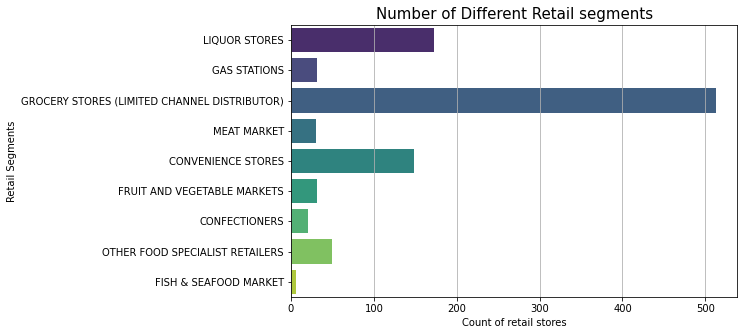

In [57]:
plt.figure(figsize=(8,5))
sns.countplot(y=retail['Retail_Segment'], palette='viridis')
plt.title('Number of Different Retail segments', fontsize=15)
plt.xlabel('Count of retail stores')
plt.ylabel('Retail Segments')
plt.grid(axis='x')
plt.show()

In [58]:
retail['CITY'].value_counts()[:10]

BOWLING GREEN    58
PADUCAH          43
COVINGTON        39
HOPKINSVILLE     37
FLORENCE         35
NEWPORT          28
ASHLAND          21
PIKEVILLE        20
SOUTH WINDSOR    19
MAYSVILLE        18
Name: CITY, dtype: int64

In case the existing customers are nearby to these retail stores, chances are the customers might be purchasing food & beverages from these retailers as well. To help get new prospects & retaining existing ones, retailers can be targeted.

## Non-Commercial Establishments Data

In [59]:
Non_Commercial = data['Non Commercial']
Non_Commercial.head()

,NAME,ADDRESS,CITY,STATE,ZIP,ZIP_PLUS4,COUNTY_CODE,COUNTY_NAME,MSA,MARKET_SEGMENT,EMPLOYEES_NON_COMMERCIAL,ENROLLMENT_RANGE,CAPACITY_BEDS_RANGE,NUMBER_OF_SCHOOLS_RANGE,OPERATION_TYPE,OWNERSHIP_TYPE,NUMBER_OF_MEALS_PER_DAY_RANGE,AVERAGE_DAILY_CENSUS,PRIMARY_GPO,SECONDARY_GPO,TOTAL_PATIENT_DAYS
0,HERITAGE HALL NORTH NURSING HOME,55 COOPER ST,AGAWAM,MA,1001,2149.0,25013,HAMPDEN,1122.0,NURSING HOME,UNCODED,NOT APPLICABLE,101 TO 500,NOT APPLICABLE,UNCODED,PUBLIC,>2000,120.0,NaN,NaN,NaN
1,AGAWAM COUNCIL ON AGING SENIOR CENTER,68 MEADOWBROOK MNR,AGAWAM,MA,1001,3126.0,25013,HAMPDEN,1122.0,"SOCIAL AND PRIVATE CLUBS, LEGIONS, FRATERNITIES",UNCODED,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,UNCODED,UNCODED,51 TO 100,NaN,NaN,NaN,NaN
2,CENTER FOR EXTENDED CARE-AMHERST,150 UNIVERSITY DR,AMHERST,MA,1002,2232.0,25015,HAMPSHIRE,8000.0,NURSING HOME,UNCODED,NOT APPLICABLE,101 TO 500,NOT APPLICABLE,UNCODED,PUBLIC,>2000,125.0,NaN,NaN,NaN
3,HAMPSHIRE COLLEGE,893 WEST ST,AMHERST,MA,1002,3372.0,25015,HAMPSHIRE,8000.0,4 YEAR COLLEGE & UNIVERSITIES,UNCODED,1001 TO 2000,NOT APPLICABLE,NOT APPLICABLE,SODEXO,PRIVATE,1001 TO 2000,NaN,NaN,NaN,NaN
4,UNIVERSITY OF MASSACHUSETTS,168 WHITMORE,AMHERST,MA,1003,NaN,25015,HAMPSHIRE,NaN,4 YEAR COLLEGE & UNIVERSITIES,UNCODED,OVER 5000,NOT APPLICABLE,NOT APPLICABLE,SELF-OPERATED,PUBLIC,>2000,NaN,NaN,NaN,NaN


In [60]:
Non_Commercial.shape

(1000, 21)

In [61]:
Non_Commercial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NAME                           1000 non-null   object 
 1   ADDRESS                        1000 non-null   object 
 2   CITY                           1000 non-null   object 
 3   STATE                          1000 non-null   object 
 4   ZIP                            1000 non-null   int64  
 5   ZIP_PLUS4                      996 non-null    float64
 6   COUNTY_CODE                    1000 non-null   int64  
 7   COUNTY_NAME                    1000 non-null   object 
 8   MSA                            972 non-null    float64
 9   MARKET_SEGMENT                 1000 non-null   object 
 10  EMPLOYEES_NON_COMMERCIAL       1000 non-null   object 
 11  ENROLLMENT_RANGE               1000 non-null   object 
 12  CAPACITY_BEDS_RANGE            1000 non-null   ob

In [62]:
Non_Commercial.isnull().sum()

NAME                               0
ADDRESS                            0
CITY                               0
STATE                              0
ZIP                                0
ZIP_PLUS4                          4
COUNTY_CODE                        0
COUNTY_NAME                        0
MSA                               28
MARKET_SEGMENT                     0
EMPLOYEES_NON_COMMERCIAL           0
ENROLLMENT_RANGE                   0
CAPACITY_BEDS_RANGE                0
NUMBER_OF_SCHOOLS_RANGE            0
OPERATION_TYPE                     0
OWNERSHIP_TYPE                     0
NUMBER_OF_MEALS_PER_DAY_RANGE      0
AVERAGE_DAILY_CENSUS             745
PRIMARY_GPO                      908
SECONDARY_GPO                    977
TOTAL_PATIENT_DAYS               973
dtype: int64

In [63]:
Non_Commercial.drop(['AVERAGE_DAILY_CENSUS', 'PRIMARY_GPO', 'SECONDARY_GPO', 'TOTAL_PATIENT_DAYS'], axis=1, inplace=True)
Non_Commercial.head(3)

,NAME,ADDRESS,CITY,STATE,ZIP,ZIP_PLUS4,COUNTY_CODE,COUNTY_NAME,MSA,MARKET_SEGMENT,EMPLOYEES_NON_COMMERCIAL,ENROLLMENT_RANGE,CAPACITY_BEDS_RANGE,NUMBER_OF_SCHOOLS_RANGE,OPERATION_TYPE,OWNERSHIP_TYPE,NUMBER_OF_MEALS_PER_DAY_RANGE
0,HERITAGE HALL NORTH NURSING HOME,55 COOPER ST,AGAWAM,MA,1001,2149.0,25013,HAMPDEN,1122.0,NURSING HOME,UNCODED,NOT APPLICABLE,101 TO 500,NOT APPLICABLE,UNCODED,PUBLIC,>2000
1,AGAWAM COUNCIL ON AGING SENIOR CENTER,68 MEADOWBROOK MNR,AGAWAM,MA,1001,3126.0,25013,HAMPDEN,1122.0,"SOCIAL AND PRIVATE CLUBS, LEGIONS, FRATERNITIES",UNCODED,NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE,UNCODED,UNCODED,51 TO 100
2,CENTER FOR EXTENDED CARE-AMHERST,150 UNIVERSITY DR,AMHERST,MA,1002,2232.0,25015,HAMPSHIRE,8000.0,NURSING HOME,UNCODED,NOT APPLICABLE,101 TO 500,NOT APPLICABLE,UNCODED,PUBLIC,>2000


In [64]:
Non_Commercial['EMPLOYEES_NON_COMMERCIAL'].value_counts()

UNCODED    891
251-500     46
1-250       31
1000+       18
751-999      8
501-750      6
Name: EMPLOYEES_NON_COMMERCIAL, dtype: int64

### Distribution of non-Commercial Segments

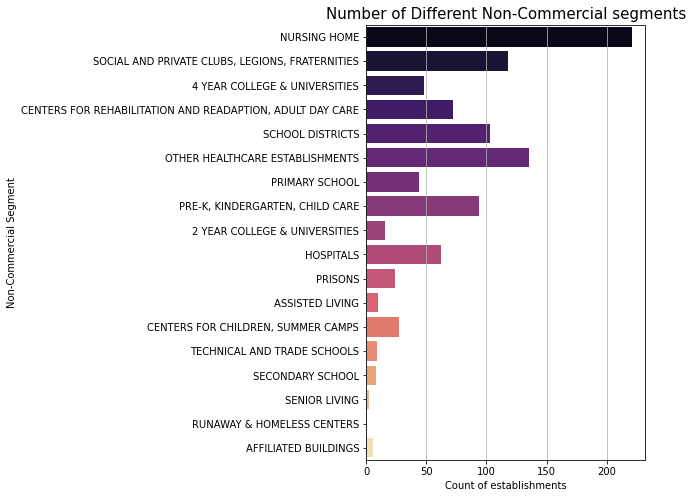

In [65]:
plt.figure(figsize=(5,8))
sns.countplot(y=Non_Commercial['MARKET_SEGMENT'], palette='magma')
plt.title('Number of Different Non-Commercial segments', fontsize=15)
plt.xlabel('Count of establishments')
plt.ylabel('Non-Commercial Segment')
plt.grid(axis='x')
plt.show()

In [66]:
Non_Commercial['CITY'].value_counts()[:10]

BOSTON         67
WORCESTER      60
SPRINGFIELD    35
LOWELL         24
LAWRENCE       24
FRAMINGHAM     21
PITTSFIELD     18
LYNN           17
HOLYOKE        16
BEVERLY        15
Name: CITY, dtype: int64

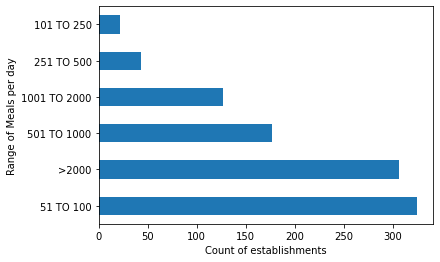

In [67]:
Non_Commercial['NUMBER_OF_MEALS_PER_DAY_RANGE'].value_counts().plot(kind='barh')
plt.xlabel('Count of establishments')
plt.ylabel('Range of Meals per day')
plt.show()

As can be seen, these non-commercial establishments have to serve anywhere between 50-2000 people on daily basis. We can target these establishments to expand our business while taking care of the type of food that can be catered to each.
The type of food can be decided based upon the segment:
* For nursing homes & hospitals (assuming patients, patient's family members & staff): nutritional food & drinks along with snacks & beverages can be a good option to target
* For educational institutes: nutritional food & drinks along with snacks & juices can be targeted
* For social clubs: snacks & beverages can be targeted